## Assignment

In this assignment, you keep working with the__[Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams/home)__ dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

- postgres_user = 'dsbc_student'
- postgres_pw = '7*.8G9QH21'
- postgres_host = '142.93.121.174'
- postgres_port = '5432'
- postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

### Import Statements

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from statistics import mean
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Dataframe

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [32]:
print(student_df['math score'].min())
print(student_df['reading score'].min())
print(student_df['writing score'].min())

0
17
10


### 1. Are the exam scores variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

_Determining if the Math, Reading and Writing Scores are Normally Distributed_

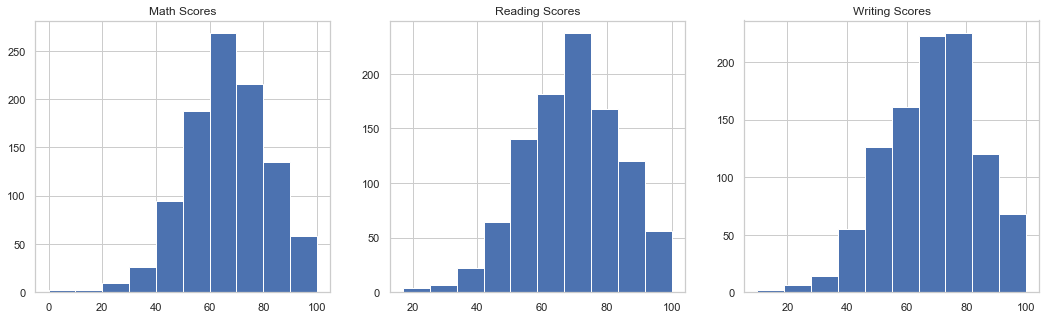

In [7]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(student_df['math score'])
plt.title('Math Scores')

plt.subplot(1, 3, 2)
plt.hist(student_df['reading score'])
plt.title('Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(student_df['writing score'])
plt.title('Writing Scores')

plt.show()

In [82]:
jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print('For the math scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the math scores:
- Jarque-Bera test statistics is 5.729312509450618 and p-value is 0.057002722181070165
- Normality test statistics is 6.181859605035282 and p-value is 0.04545966623572814


In [81]:
jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print('For the reading scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the reading scores:
- Jarque-Bera test statistics is 11.383300575987892 and p-value is 0.0033740202672214448
- Normality test statistics is 11.11741279628622 and p-value is 0.003853758403576582


In [80]:
jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print('For the writing scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the writing scores:
- Jarque-Bera test statistics is 13.98509448257235 and p-value is 0.0009187033894586527
- Normality test statistics is 13.606450837263859 and p-value is 0.0011101885439899974


Because the p-values are 0 or less, which indicates that the distribution of the math, reading and writing scores are statistically different from a normal distribution.

_Changing the Variables to a Normal Distribution Using a Box-Cox Transformation_

In [33]:
print(student_df['math score'].min())
print(student_df['reading score'].min())
print(student_df['writing score'].min())

0
17
10


A Box-Cox transformation doesn't work if there are zero values, so I'm going to apply one-way winsorization to the math scores to remove the zero at the low-end of the value distribution.

In [40]:
student_df['math score'] = winsorize(student_df['math score'], (0.01, 0))

student_df['math score'].min()

28

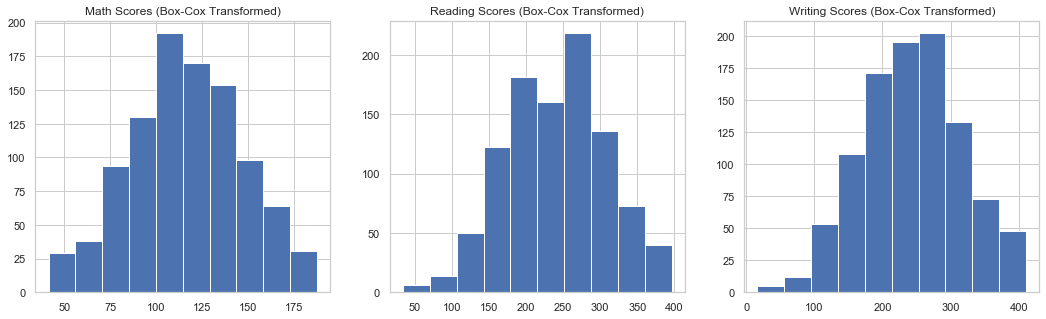

In [55]:
math_scores_boxcox,_ = boxcox(student_df['math score'])
reading_scores_boxcox,_ = boxcox(student_df['reading score'])
writing_scores_boxcox,_ = boxcox(student_df['writing score'])

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(math_scores_boxcox)
plt.title('Math Scores (Box-Cox Transformed)')

plt.subplot(1, 3, 2)
plt.hist(reading_scores_boxcox)
plt.title('Reading Scores (Box-Cox Transformed)')

plt.subplot(1, 3, 3)
plt.hist(writing_scores_boxcox)
plt.title('Writing Scores (Box-Cox Transformed)')

plt.show()

In [79]:
jb_stats = jarque_bera(math_scores_boxcox)
norm_stats = normaltest(math_scores_boxcox)

print('For the math scores:')
print('- Jarque-Bera test statistics is {0} and p-vlue is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_scores_boxcox)
norm_stats = normaltest(reading_scores_boxcox)

print('For the reading scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_scores_boxcox)
norm_stats = normaltest(writing_scores_boxcox)

print('For the writing scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the math scores:
- Jarque-Bera test statistics is 4.1787545667002455 and p-vlue is 0.12376418184273563
- Normality test statistics is 5.378818036208129 and p-value is 0.06792106763437968
For the reading scores:
- Jarque-Bera test statistics is 4.119778573559665 and p-value is 0.127468081515408
- Normality test statistics is 5.282274606965809 and p-value is 0.07128015626992971
For the writing scores:
- Jarque-Bera test statistics is 4.746478090042761 and p-value is 0.09317842784043195
- Normality test statistics is 6.267311355052559 and p-value is 0.04355827085003712


The Jaque-Bera test shows all the transformations are normally distributed.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

_Finding the Weighted Average_

In [68]:
average_scores = (student_df['math score'] + student_df['reading score'] + student_df['writing score']) / 3

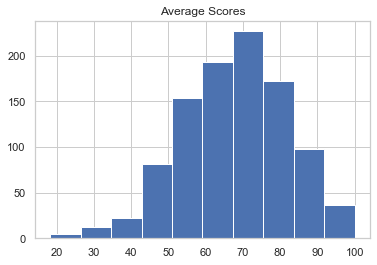

In [69]:
plt.hist(average_scores)
plt.title('Average Scores')

plt.show()

In [83]:
jb_stats = jarque_bera(average_scores)
norm_stats = normaltest(average_scores)

print('For the writing scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the writing scores:
- Jarque-Bera test statistics is 10.511522611855671 and p-value is 0.005217372762822858
- Normality test statistics is 10.283567203870255 and p-value is 0.005847251238436822


The Jaque-Bera test shows the p-values are zero and that the distribution isn't normal.

_Applying a Box-Cox Transformation_

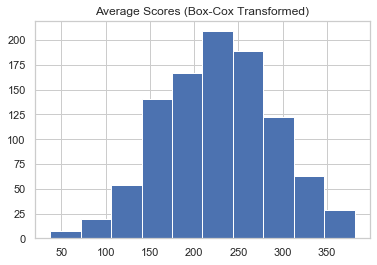

In [85]:
average_scores_boxcox,_ = boxcox(average_scores)

plt.hist(average_scores_boxcox)
plt.title('Average Scores (Box-Cox Transformed)')

plt.show()

In [86]:
jb_stats = jarque_bera(average_scores_boxcox)
norm_stats = normaltest(average_scores_boxcox)

print('For the writing scores:')
print('- Jarque-Bera test statistics is {0} and p-value is {1}'.format(jb_stats[0], jb_stats[1]))
print('- Normality test statistics is {0} and p-value is {1}'.format(norm_stats[0], norm_stats[1]))

For the writing scores:
- Jarque-Bera test statistics is 3.5449968579227042 and p-value is 0.16990795513239199
- Normality test statistics is 4.387969232121762 and p-value is 0.11147169062477401


The Jaque-Bera test shows all the transformations are normally distributed.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

_Plotting Categorical Variables Against a Continous Variable_

In [87]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


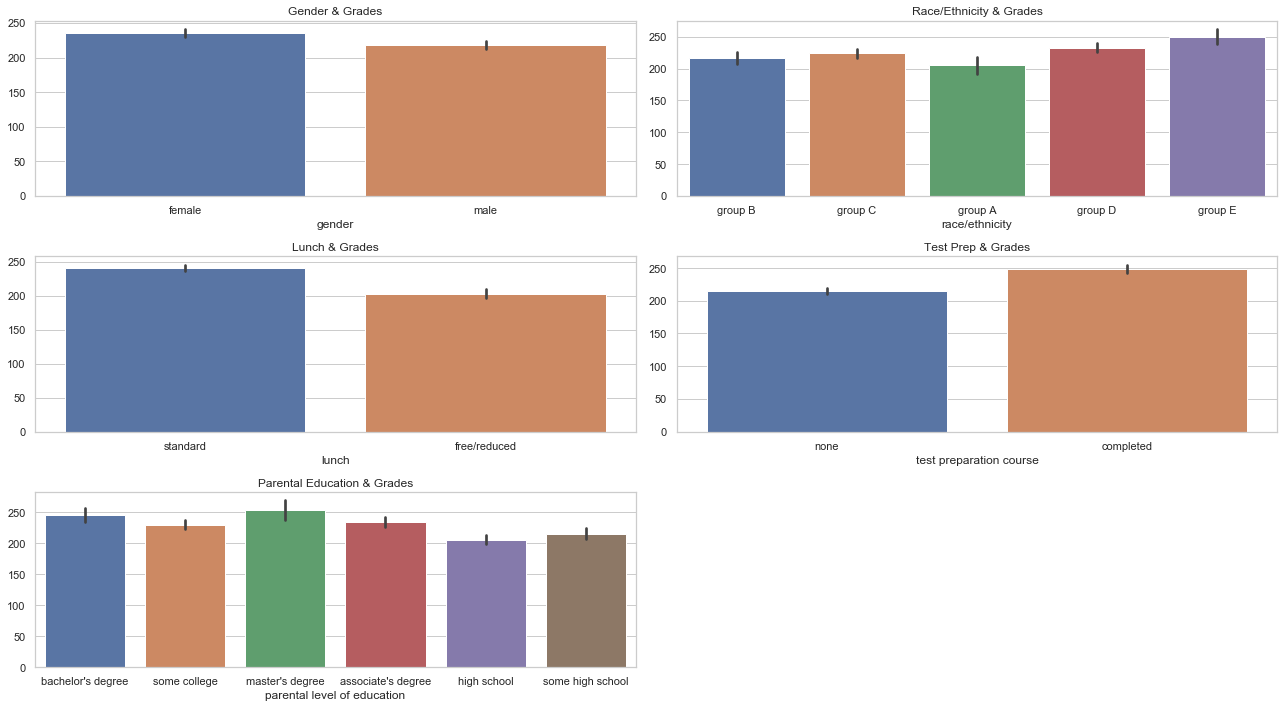

In [102]:
plt.figure(figsize=(18, 10))

plt.subplot(3, 2, 1)
sns.barplot(student_df['gender'], average_scores_boxcox)
plt.title('Gender & Grades')

plt.subplot(3, 2, 2)
sns.barplot(student_df['race/ethnicity'], average_scores_boxcox)
plt.title('Race/Ethnicity & Grades')

plt.subplot(3, 2, 3)
sns.barplot(student_df['lunch'], average_scores_boxcox)
plt.title('Lunch & Grades')

plt.subplot(3, 2, 4)
sns.barplot(student_df['test preparation course'], average_scores_boxcox)
plt.title('Test Prep & Grades')

plt.subplot(3, 2, 5)
sns.barplot(student_df['parental level of education'], average_scores_boxcox)
plt.title('Parental Education & Grades')

plt.tight_layout()
plt.show()

1. Gender & Grades: females show better test scores than males. 
2. Race/Ethnicity & Grades: average scores consistently increase from Group A through Group E.
3. Lunch & Grades: students that get free/reduced lunch have lower test scores than students with standard lunch. 
4. Test Prep & Grades: students that completed test prep have higher scores than those that didn't.
5. Parental Education & Grades: students whose parents have more schooling than those whose parents have less education.

All of the variables are related to the target variable and can be used as a predictor for success on exams.